<a href="https://colab.research.google.com/github/BDavidoff/Data620/blob/master/DATA620_Week6_Assignment_GDavis_BDavidoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA620: Week 6 Assignment
#### by Glen Davis and Brett Davidoff

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import os
import pandas as pd
import seaborn as sns

## Introduction

We load the Davis Southern Club Women dataset using code provided in [the algorithms section of the NetworkX library documentation](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html).

In [ ]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


## Analysis

To deduce anything regarding these women and the social events they attended, we first draw a bipartite graph with the women's nodes labeled by their initials and the event nodes labeled numerically. We also color-code the two different types of nodes.

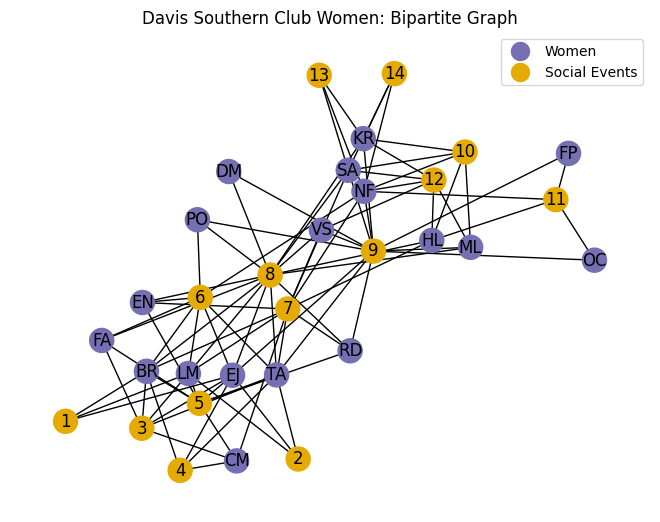

In [ ]:
init_list = ["EJ", "LM", "TA", "BR", "CM", "FA", "EN", "PO", "RD", "VS", "ML", "KR", "SA", "NF", "HL", "DM", "OC", "FP"]
init_dict = dict(zip(G.graph["top"], init_list))
event_dict = dict(zip(G.graph["bottom"], list(range(1, 15))))
color_dict = dict(zip(G.nodes, ["#7570B3"] * len(G.graph["top"]) + ["#E6AB02"] * len(G.graph["bottom"])))
nx.set_node_attributes(G, init_dict, name="init")
nx.set_node_attributes(G, event_dict, name="event")
nx.set_node_attributes(G, color_dict, name = "color")
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
def concat(d1, d2):
    return {**d1, **d2}
labs = concat(init_dict, event_dict)
colors = [n[1]["color"] for n in G.nodes(data=True)]
nx.draw(G, pos, labels=labs, node_color = colors, with_labels=True)
legend_elements = [Line2D([0], [0], marker='o', color='w', label="Women",
                          markerfacecolor="#7570B3", markersize=15),
                   Line2D([0], [0], marker='o', color='w', label="Social Events",
                          markerfacecolor="#E6AB02", markersize=15)]
plt.legend(handles=legend_elements, loc='upper right')
plt.title("Davis Southern Club Women: Bipartite Graph")
plt.show()

Next we project this bipartite graph onto the women's nodes and calculate the degree centrality for each node.

In [ ]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("(Member, Number of Friends)")
degrees = sorted(W.degree, key=lambda x: x[1], reverse=True)
for d in degrees:
    print(d)


(Member, Number of Friends)
('Evelyn Jefferson', 17)
('Theresa Anderson', 17)
('Ruth DeSand', 17)
('Verne Sanderson', 17)
('Sylvia Avondale', 17)
('Nora Fayette', 17)
('Helen Lloyd', 17)
('Pearl Oglethorpe', 16)
('Myra Liddel', 16)
('Katherina Rogers', 16)
('Dorothy Murchison', 16)
('Laura Mandeville', 15)
('Brenda Rogers', 15)
('Frances Anderson', 15)
('Eleanor Nye', 15)
('Olivia Carleton', 12)
('Flora Price', 12)
('Charlotte McDowd', 11)


Looking solely at the unweighted number of connections between women, Evelyn Jefferson and six other women have the highest degree centrality scores possible: 17. This means they have all attended at least one social event with every other woman in this network since there are only 18 women in the network total.

Next we weight the degree scores so that each time a woman attended an event with another woman, that meeting counts as an additional connection.

In [ ]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("(Member, Number of Friend Meetings)")
degrees = sorted(W.degree(weight="weight"), key=lambda x: x[1], reverse=True)
for d in degrees:
    print(d)


(Member, Number of Friend Meetings)
('Theresa Anderson', 57)
('Evelyn Jefferson', 50)
('Brenda Rogers', 46)
('Sylvia Avondale', 46)
('Laura Mandeville', 45)
('Nora Fayette', 43)
('Ruth DeSand', 40)
('Verne Sanderson', 38)
('Katherina Rogers', 37)
('Eleanor Nye', 36)
('Helen Lloyd', 34)
('Myra Liddel', 33)
('Frances Anderson', 32)
('Pearl Oglethorpe', 31)
('Charlotte McDowd', 24)
('Dorothy Murchison', 24)
('Olivia Carleton', 14)
('Flora Price', 14)


Here, we can see that of the seven women who have connections to all other women in the network, Theresa Anderson could be considered the most social. Her weighted degree score is the highest at 57, meaning she has more repeated connections than anyone else in the network.

We can visualize which women attended the most events together by using repeated connections at social events as the edge weights between them in a projected graph.

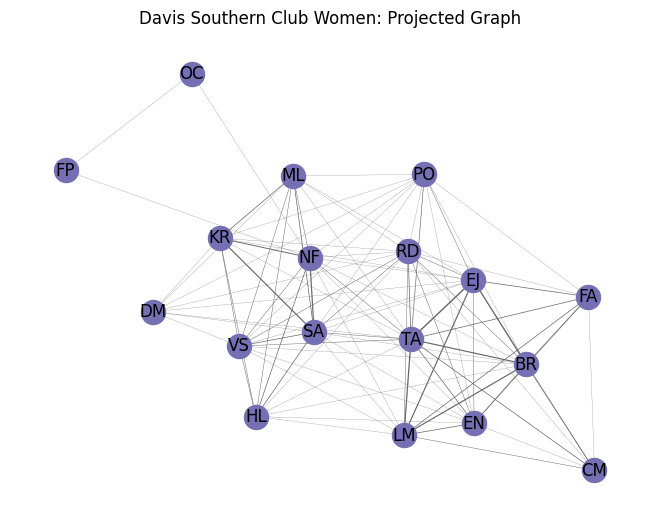

In [ ]:
e_wts = list(nx.get_edge_attributes(W, "weight").values())
lo, hi = min(e_wts), max(e_wts)
e_wts =  [(x - lo) / (hi - lo) for x in e_wts]
pos = nx.spring_layout(W, seed=648)  # Seed layout for reproducible node positions
nx.draw(W, pos, labels=init_dict, node_color="#7570B3", width=e_wts, edge_color="#666666", with_labels=True)
plt.title("Davis Southern Club Women: Projected Graph")
plt.show()

For the next step, we projected the bipartite graph onto social events in order to see if there are any events that are significant

In [ ]:
# Project the bipartite graph onto social events
events = G.graph["bottom"]
E = bipartite.weighted_projected_graph(G, events)

# Analyze the degree of each event node
print("\nEvent Popularity (Number of Unique Attendees):")
for event, degree in sorted(E.degree(), key=lambda x: x[1], reverse=True):
    print(f"{event}: {degree}")



Event Popularity (Number of Unique Attendees):
E6: 13
E7: 13
E8: 13
E9: 13
E1: 8
E2: 8
E3: 8
E4: 8
E5: 8
E10: 8
E11: 8
E12: 8
E13: 8
E14: 8


based on these resutls, events 6 through 9 are all the most significant with a popularity of 13 each.  Next, the code examines the weighted edges of the graph E to determine the number of shared attendees between pairs of events. It prints each pair of events and the count of shared attendees, sorted by this count in descending order to highlight the most interconnected events.

In [ ]:
# Analyze the weighted edges to see the shared attendees count
print("\nShared Attendees Between Events:")
for (u, v, weight) in sorted(E.edges(data=True), key=lambda x: x[2]['weight'], reverse=True):
    print(f"{u} - {v}: {weight['weight']} shared attendees")

# Clustering coefficient for the events network
clustering = nx.clustering(E, weight='weight')
print("\nEvent Clustering Coefficients (Indicative of closely-knit groups):")
for event, coeff in sorted(clustering.items(), key=lambda x: x[1], reverse=True):
    print(f"{event}: {coeff:.2f}")

# Network density
density = nx.density(E)
print(f"\nNetwork Density: {density:.2f}")
print("A higher density indicates a more interconnected network of social events.")




Shared Attendees Between Events:
E8 - E9: 9 shared attendees
E7 - E8: 8 shared attendees
E5 - E8: 7 shared attendees
E6 - E8: 7 shared attendees
E3 - E5: 6 shared attendees
E5 - E7: 6 shared attendees
E5 - E6: 6 shared attendees
E3 - E8: 5 shared attendees
E3 - E6: 5 shared attendees
E6 - E7: 5 shared attendees
E7 - E9: 5 shared attendees
E8 - E12: 5 shared attendees
E9 - E12: 5 shared attendees
E10 - E12: 5 shared attendees
E3 - E7: 4 shared attendees
E3 - E4: 4 shared attendees
E4 - E5: 4 shared attendees
E6 - E9: 4 shared attendees
E7 - E12: 4 shared attendees
E8 - E10: 4 shared attendees
E9 - E10: 4 shared attendees
E1 - E8: 3 shared attendees
E1 - E6: 3 shared attendees
E1 - E3: 3 shared attendees
E1 - E5: 3 shared attendees
E2 - E8: 3 shared attendees
E2 - E6: 3 shared attendees
E2 - E3: 3 shared attendees
E2 - E5: 3 shared attendees
E4 - E7: 3 shared attendees
E4 - E8: 3 shared attendees
E4 - E6: 3 shared attendees
E5 - E9: 3 shared attendees
E7 - E10: 3 shared attendees
E9 - E

Events E8 and E9 have the highest number of shared attendees (9), indicating a strong connection or similarity between these two events. This suggests that the same group of people tends to attend both events, possibly due to similar interests or themes.  Event E8 appears frequently in the list of shared attendees, indicating it has a central role in the network.  E5 with 0.46 suggests that attendees of this event tend to also cluster around a specific group of other events, indicating closely-knit groups within the network.  The network density of 0.73 is relatively high, suggesting that the social events are highly interconnected. This indicates that, on average, there are strong ties and a significant level of attendee overlap between events.

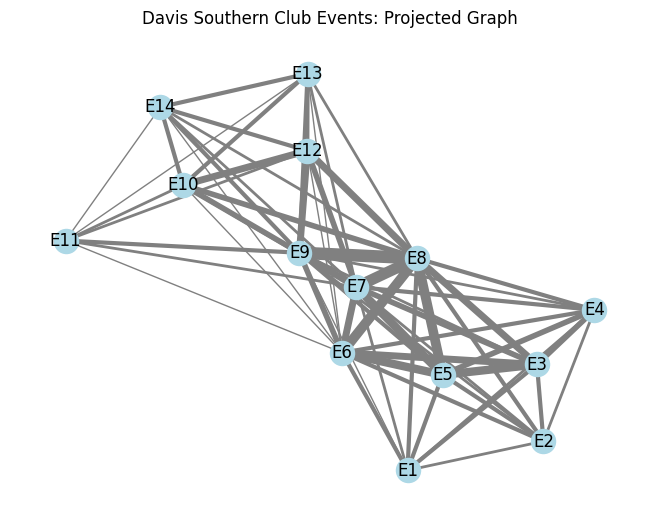

In [ ]:
# Visualizing the projected graph of events
pos = nx.spring_layout(E, seed=648)  # Seed for reproducible layout
weights = [E[u][v]['weight'] for u,v in E.edges()]
nx.draw(E, pos, with_labels=True, width=weights, edge_color="grey", node_color="lightblue")
plt.title("Davis Southern Club Events: Projected Graph")
plt.show()